In [1]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib notebook

# Dane

In [57]:
sentences = []

for i in range(100000):
    start = np.random.randint(0, 20)
    finish = start + np.random.randint(1, 10)
    sentence = [str(x) for x in range(start, finish)]
    sentences.append(sentence)
sentences

[['11', '12', '13', '14', '15'],
 ['8', '9', '10', '11', '12', '13', '14', '15', '16'],
 ['3', '4'],
 ['6', '7', '8', '9', '10', '11', '12', '13', '14'],
 ['10', '11', '12', '13', '14', '15', '16'],
 ['9', '10', '11', '12', '13', '14'],
 ['13', '14', '15', '16', '17'],
 ['13'],
 ['11', '12', '13', '14'],
 ['4', '5', '6', '7', '8'],
 ['18', '19', '20', '21', '22', '23'],
 ['5'],
 ['9', '10', '11', '12', '13'],
 ['9'],
 ['16', '17', '18', '19', '20', '21', '22', '23'],
 ['17', '18', '19', '20', '21', '22', '23', '24', '25'],
 ['13', '14', '15', '16', '17', '18', '19', '20', '21'],
 ['3', '4', '5', '6', '7', '8', '9', '10', '11'],
 ['13', '14', '15', '16', '17', '18'],
 ['8', '9', '10', '11', '12'],
 ['8', '9', '10', '11', '12', '13', '14'],
 ['4', '5', '6', '7', '8'],
 ['1', '2', '3', '4'],
 ['4'],
 ['18', '19', '20', '21', '22', '23', '24'],
 ['19', '20', '21', '22', '23', '24'],
 ['19', '20', '21'],
 ['13', '14', '15', '16', '17', '18', '19'],
 ['11', '12'],
 ['19', '20', '21', '22'],


# Model Word2Vec

In [45]:
model = Word2Vec(sentences, size=10, window=4, min_count=1)

In [46]:
#model.wv['13']
model.wv.vocab

{'8': <gensim.models.keyedvectors.Vocab at 0x7f73c8102080>,
 '11': <gensim.models.keyedvectors.Vocab at 0x7f73c046c358>,
 '12': <gensim.models.keyedvectors.Vocab at 0x7f73c046c6d8>,
 '2': <gensim.models.keyedvectors.Vocab at 0x7f73c046c390>,
 '9': <gensim.models.keyedvectors.Vocab at 0x7f73b46649b0>,
 '3': <gensim.models.keyedvectors.Vocab at 0x7f73b4664940>,
 '4': <gensim.models.keyedvectors.Vocab at 0x7f73b4664898>,
 '5': <gensim.models.keyedvectors.Vocab at 0x7f73b4664cc0>,
 '6': <gensim.models.keyedvectors.Vocab at 0x7f73b4664dd8>,
 '7': <gensim.models.keyedvectors.Vocab at 0x7f73b4664fd0>,
 '10': <gensim.models.keyedvectors.Vocab at 0x7f73b4664e48>,
 '13': <gensim.models.keyedvectors.Vocab at 0x7f73b4664f60>,
 '14': <gensim.models.keyedvectors.Vocab at 0x7f73b4664ef0>,
 '15': <gensim.models.keyedvectors.Vocab at 0x7f73b4664b38>,
 '16': <gensim.models.keyedvectors.Vocab at 0x7f73b4664c88>,
 '17': <gensim.models.keyedvectors.Vocab at 0x7f73b1f41f60>,
 '18': <gensim.models.keyedvecto

In [47]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 8))
    sns.heatmap(model.wv[model.wv.vocab], linewidths = .3)

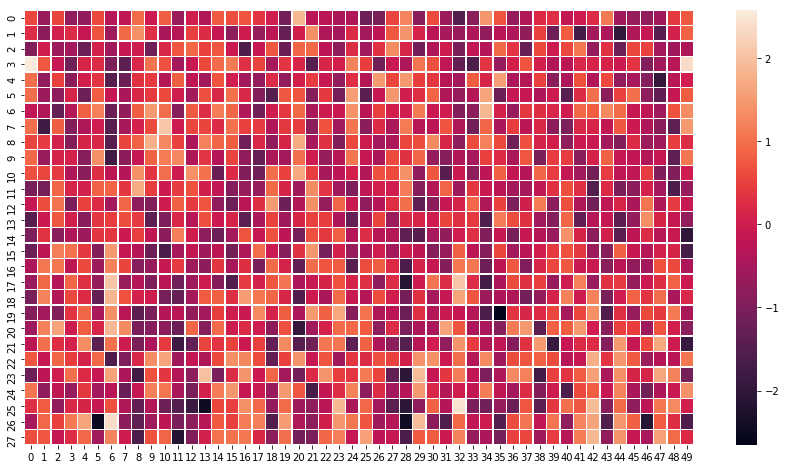

In [48]:
plot_heatmap(Word2Vec(sentences, size=50, window=5))

# PCA

In [49]:
def plot_pca(model):
    
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(result[:, 0], result[:, 1])
    
    words = list(model.wv.vocab)
    for i, w in enumerate(words):
        plt.annotate(w, xy=(result[i, 0], result[i, 1]))

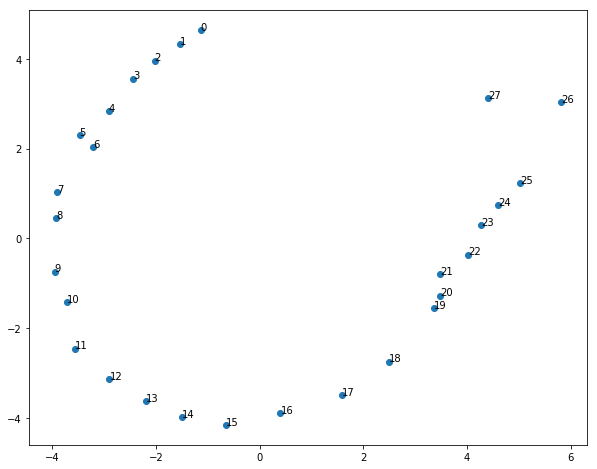

In [50]:
plot_pca(Word2Vec(sentences, size=50, window=5))

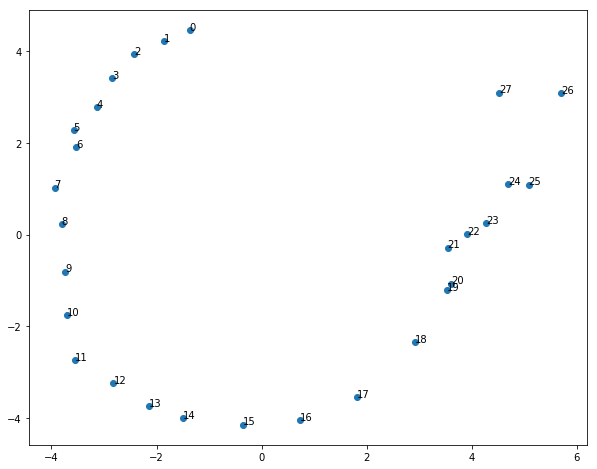

In [51]:
plot_pca(Word2Vec(sentences, size=50, window=10))

In [52]:
model.wv.most_similar('4', topn=3)

[('0', 0.702770471572876),
 ('8', 0.6631699204444885),
 ('1', 0.6607469320297241)]

In [56]:
model.wv.most_similar(positive=['10', '8'], negative=['5'], topn=3)

[('13', 0.6458409428596497),
 ('11', 0.5748525857925415),
 ('9', 0.43752917647361755)]